In [5]:
# 01_segment_ribeye.ipynb

import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from segment_anything import sam_model_registry, SamPredictor

In [6]:
# 🔧 Paths
checkpoint_path = "../checkpoints/sam_vit_h_4b8939.pth"
image_path = "../imgs/marbling.jpg"

# 📷 Cargar imagen
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

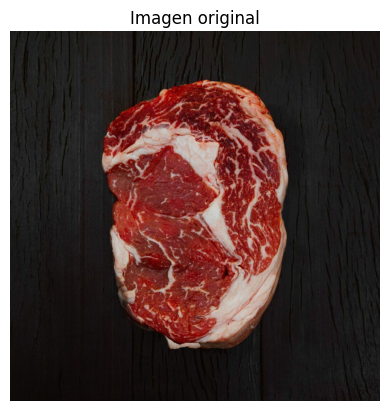

In [7]:
plt.imshow(image_rgb)
plt.title("Imagen original")
plt.axis("off")
plt.show()


In [8]:

# 🧠 Cargar modelo SAM
sam = sam_model_registry["vit_h"](checkpoint=checkpoint_path)
device = "cuda" if torch.cuda.is_available() else "cpu"
sam.to(device=device)

Sam(
  (image_encoder): ImageEncoderViT(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 1280, kernel_size=(16, 16), stride=(16, 16))
    )
    (blocks): ModuleList(
      (0-31): 32 x Block(
        (norm1): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=1280, out_features=3840, bias=True)
          (proj): Linear(in_features=1280, out_features=1280, bias=True)
        )
        (norm2): LayerNorm((1280,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (lin1): Linear(in_features=1280, out_features=5120, bias=True)
          (lin2): Linear(in_features=5120, out_features=1280, bias=True)
          (act): GELU(approximate='none')
        )
      )
    )
    (neck): Sequential(
      (0): Conv2d(1280, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): LayerNorm2d()
      (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (3): LayerNorm2d

In [9]:

predictor = SamPredictor(sam)
predictor.set_image(image_rgb)

# 🎯 Simulación de un punto de carne y uno de grasa (ejemplo visual, se puede mejorar)
input_points = np.array([[200, 300], [400, 300]])  # X, Y
input_labels = np.array([1, 1])  # 1 = foreground

In [10]:
# 🎭 Segmentación con SAM
masks, scores, logits = predictor.predict(
    point_coords=input_points,
    point_labels=input_labels,
    multimask_output=True
)

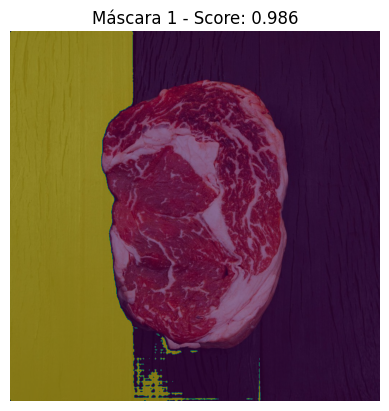

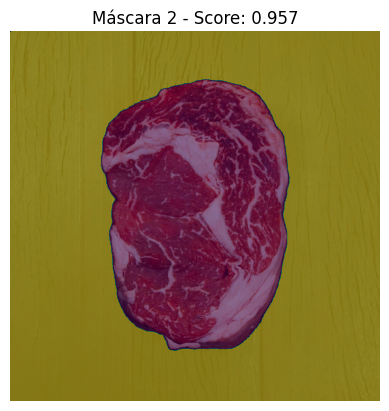

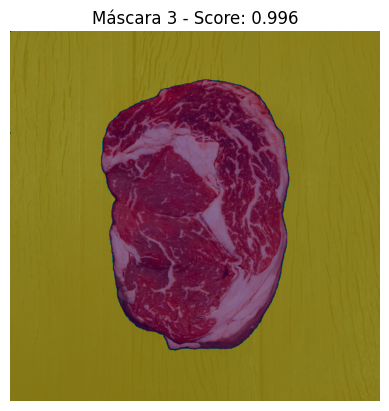

In [11]:
# 🎨 Mostrar máscaras
for i, mask in enumerate(masks):
    plt.figure()
    plt.imshow(image_rgb)
    plt.imshow(mask, alpha=0.5)
    plt.title(f"Máscara {i+1} - Score: {scores[i]:.3f}")
    plt.axis("off")
    plt.show()